In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Reading the data

In [121]:
df_train=pd.read_csv("E:\\Datasets\\MNIST\\train.csv")

In [122]:
df_test=pd.read_csv("E:\\Datasets\\MNIST\\test.csv")

In [123]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
df_train.shape

(42000, 785)

In [125]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
df_test.shape

(28000, 784)

In [127]:
df_train.isna().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [128]:
features=df_train.values[:,1:]

In [129]:
label=df_train.values[:,0]

In [130]:
label

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [131]:
features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [132]:
m=features.shape[0]
n=features.shape[1]
uniq_labels=np.unique(label)
num_labels=len(uniq_labels)
print("Number of rows",m)
print("number of Columns",n)
print("Number of Unique Labels",num_labels)


Number of rows 42000
number of Columns 784
Number of Unique Labels 10


In [133]:
max_feature=np.max(features)
min_feature=np.min(features)

In [134]:
print(max_feature)
print(min_feature)

255
0


# NOrmalize the data

In [135]:
np_features=features/255.0

In [136]:
np_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
df_test=df_test.values/255.0

In [138]:
np.max(df_test)

1.0

In [139]:
reshaped_features = np_features.reshape(-1, 28, 28, 1)
test=df_test.reshape(-1,28,28,1)

In [140]:
reshaped_features.shape

(42000, 28, 28, 1)

# Visualizing the data

In [141]:
#

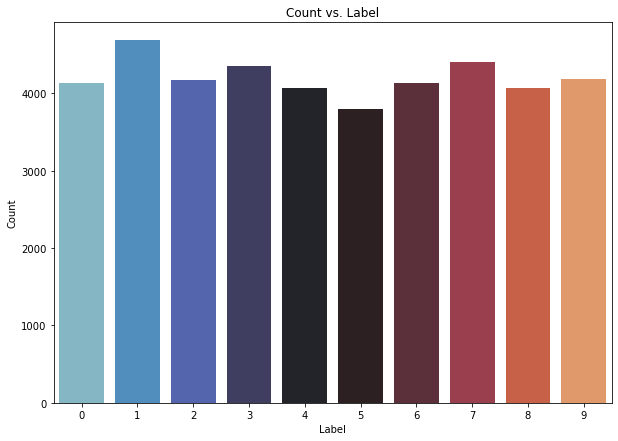

In [142]:
plt.figure(figsize=(10,7))
sns.countplot(label, palette='icefire')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count vs. Label')
plt.show()

In [143]:
one_hot_labels = tf.one_hot(label, depth=num_labels).numpy()

In [144]:
x_train, x_val, y_train, _val = train_test_split(reshaped_features, one_hot_labels, test_size=0.1, random_state=1)

# Model

In [145]:
model=Sequential()

In [146]:
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=(28,28,1)))

In [147]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [148]:
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))

In [149]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [150]:
model.add(
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))

In [151]:
model.add(
    layers.MaxPool2D(pool_size=(2,2)))


In [152]:
model.add( layers.Flatten() )

In [153]:
model.add( layers.Dense(128, activation='relu') )
model.add( layers.Dense(num_labels, activation='softmax'))

In [154]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )


In [155]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [156]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),batch_size=128,epochs=20,shuffle=True)

Epoch 1/20
296/296 [==============================] - 30s 94ms/step - loss: 0.7264 - accuracy: 0.7817 - val_loss: 0.0880 - val_accuracy: 0.9752
Epoch 2/20
296/296 [==============================] - 30s 100ms/step - loss: 0.0776 - accuracy: 0.9761 - val_loss: 0.0680 - val_accuracy: 0.9781
Epoch 3/20
296/296 [==============================] - 32s 108ms/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 4/20
296/296 [==============================] - 31s 104ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0443 - val_accuracy: 0.9869
Epoch 5/20
296/296 [==============================] - 34s 115ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0416 - val_accuracy: 0.9864
Epoch 6/20
296/296 [==============================] - 32s 107ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0359 - val_accuracy: 0.9879
Epoch 7/20
296/296 [==============================] - 30s 102ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0476 - val_acc

# Visualizing the results

In [158]:
acc=history.history["accuracy"]

In [159]:
val_accuracy=history.history["val_accuracy"]

In [160]:
loss=history.history["loss"]

In [161]:
val_loss=history.history["val_loss"]

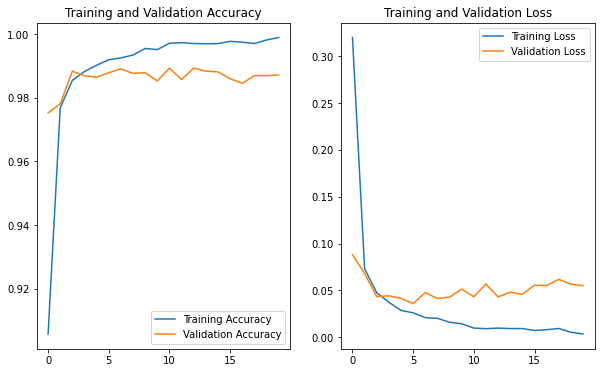

In [162]:
epochs_range = range(20)

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [163]:
pred_y=model.predict(test)